# Исследование данных продаж игр

**Цель: составить приметы популярных игр на 2017 год<br>
Описание данных: датасет с данными о продажах магазина "Стримчик"<br>
План: изучение данных, определение актуального периода, составление портрета потребителя, проверка гипотез о рынке игр.<br>**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/datasets/games.csv')

## ***Раздел обработки данных***<br>
В данном разделе происходит подготовка данных к анализу, убираются повторы и типы приводяться к более информативным

### Обзор данных

In [3]:
display(data)
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Приведем таблицу к стнадартному виду, уберем явные дубликаты и заполним пропуски

In [4]:
data.columns= data.columns.str.lower()

In [5]:
print(data.isna().sum())

data = data.drop(data[data['name'].isna()].index)
data = data.drop_duplicates()
data = data.drop(data[data['year_of_release'].isna()].index)
data['rating'] = data['rating'].fillna('No_ESRB')

print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64


Удалены игры без названия и игры без года выпуска. Удалены явные дубликаты и пропуски в колонке рейтинг заменены на No_ESRB

In [6]:
data.columns=data.columns.str.lower()
data['year_of_release'] = data['year_of_release'].astype('Int16')
data['rating'] = data['rating'].astype('category')
#data['genre'] = data['genre'].astype('category')
data.loc[data['user_score']=='tbd', 'user_score']=None
data['user_score'] = pd.to_numeric(data['user_score'], downcast='float',errors='ignore')
#print(data['user_score'].unique())

Заменены типы данных в столбцах годы на целочисленные, рейтинг ESRB на категориальные, жанр на категориальные, так же tbd было заменно на nan, и приведены оценки пользователей к числам с плавающей точкой, а оценки критиков к целым числам. 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  object  
 1   platform         16444 non-null  object  
 2   year_of_release  16444 non-null  Int16   
 3   genre            16444 non-null  object  
 4   na_sales         16444 non-null  float64 
 5   eu_sales         16444 non-null  float64 
 6   jp_sales         16444 non-null  float64 
 7   other_sales      16444 non-null  float64 
 8   critic_score     7983 non-null   float64 
 9   user_score       7463 non-null   float32 
 10  rating           16444 non-null  category
dtypes: Int16(1), category(1), float32(1), float64(5), object(3)
memory usage: 1.3+ MB


Создадим колонку для общих продаж игр

In [8]:
data['all_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [9]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No_ESRB,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No_ESRB,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No_ESRB,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,No_ESRB,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No_ESRB,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,No_ESRB,0.01


Пропуски в коллонках отзывов могут появится по разным причинам игра только вышла или очень непопулярна, пропуски не заполнены по причине того что при обработке они все равно не будут учтены, а заполнять их медианными значениями для жанра тоже не имеет смысла и может только повредить анализу.

In [10]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  object  
 1   platform         16444 non-null  object  
 2   year_of_release  16444 non-null  Int16   
 3   genre            16444 non-null  object  
 4   na_sales         16444 non-null  float64 
 5   eu_sales         16444 non-null  float64 
 6   jp_sales         16444 non-null  float64 
 7   other_sales      16444 non-null  float64 
 8   critic_score     7983 non-null   float64 
 9   user_score       7463 non-null   float32 
 10  rating           16444 non-null  category
 11  all_sales        16444 non-null  float64 
dtypes: Int16(1), category(1), float32(1), float64(6), object(3)
memory usage: 1.4+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Art

**Данные готовы к обработке**

## ***Раздел анализ данных***<br>
В данном разделе ведется первичный анализ данных, ищутся общие закономерности и наглядно показываются данные

### Визиулизируем данные о количестве игр за каждый год

<AxesSubplot:xlabel='year_of_release', ylabel='total number of games'>

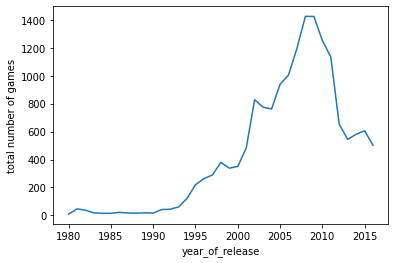

In [11]:
data.groupby('year_of_release')['name'].count().plot(ylabel='total number of games')

Видно что количество выпущенных игр после 2008-2009 года пошло на спад, это скорее всего связанно с затратами на производство игр, новейшие технологии и требования пользователей увеличивают время разработки.

### Визиулизируем данные о количестве игр на каждой платформе

<AxesSubplot:xlabel='platform', ylabel='number of games'>

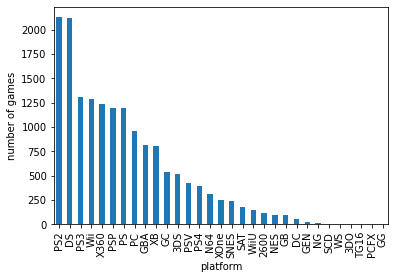

In [12]:
data.groupby('platform').count().sort_values(by='name',ascending=False)['name'].plot(kind='bar',ylabel='number of games')

Из этого графика о количество игр на каждой платформе, вижно что за все время на платформах PS2 и DS было сделано больше игр.

### Визиулизируем данные о количестве игр на каждой консоли за год <br>
Это поможет нам найти актуальный период для прогнозирования 2017 года, и актуальные платформы

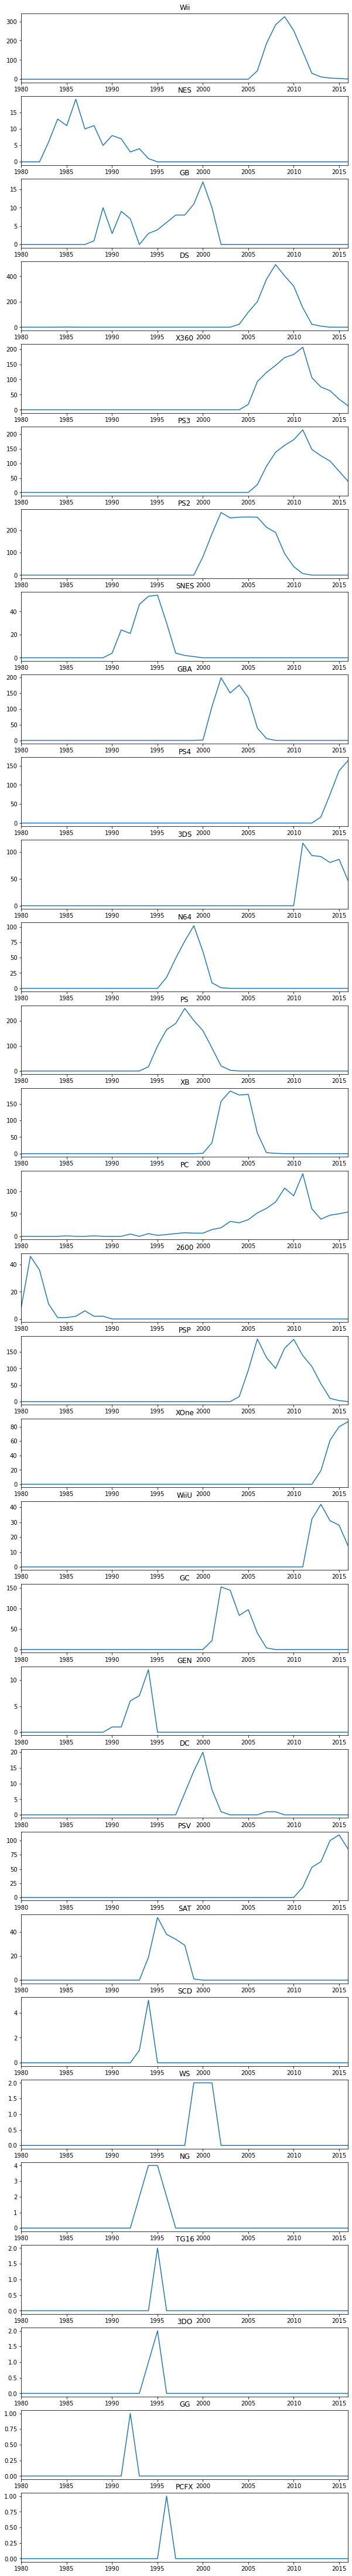

In [13]:
data_sub=data.copy()
data_sub['year_of_release']=data_sub['year_of_release'].astype('category')
fig, ax = plt.subplots(len(data_sub['platform'].unique()),figsize=(10,80))

j=0
for i in data_sub['platform'].unique():
    ax[j].plot(list(data_sub[data_sub['platform']==i].groupby('year_of_release').count().index.values),\
               data_sub[data_sub['platform']==i].groupby('year_of_release').count()['name'].to_list())
    ax[j].set_title(i)
    ax[j].set_xlim([1980,2016])
    j+=1
    


Можем заметить что консоли держаться в основном в промежутке от 5 до 15, самые популярные консоли лежат в рамках 6-10 лет, поэтому возьмем 4 года как актуальное для анализа время чтобы захватить растущие тренды и не взять угасающие.
Из графиков видно что заканчивается эра PS3, 3DS, WiiU, и идет на спад PSVita, растут PS4, PC, Xbox One.

Выделим актуальный период, отбросив неактуальные данные

In [14]:
data_act=data[data['year_of_release']>=2013]

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Проект не структурирован, не понятно, что мы делаем и зачем, что получаем и какие делаем выводы из анализа.</font>

### Визуализируем общие продажи по платформам с выделением медианы и верхней и нижней квантили

<AxesSubplot:title={'center':'all_sales'}, xlabel='platform'>

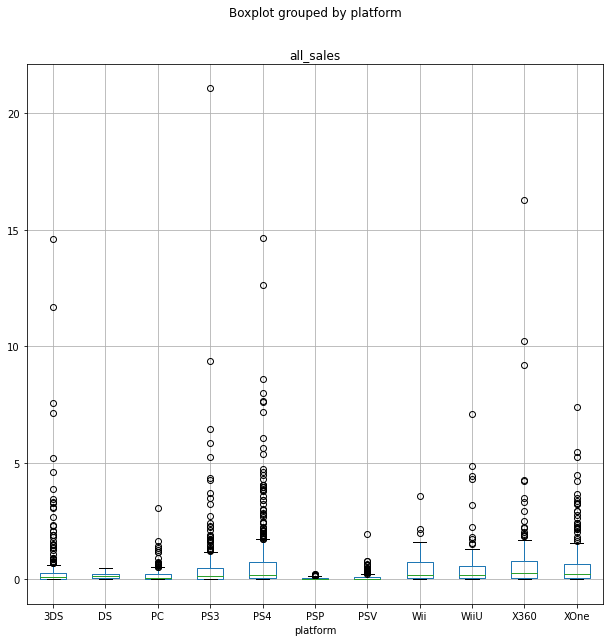

In [15]:
data_act.boxplot(by='platform',column='all_sales',figsize=(10,10))
#[data_act['year_of_release']==2016]

(0.0, 2.0)

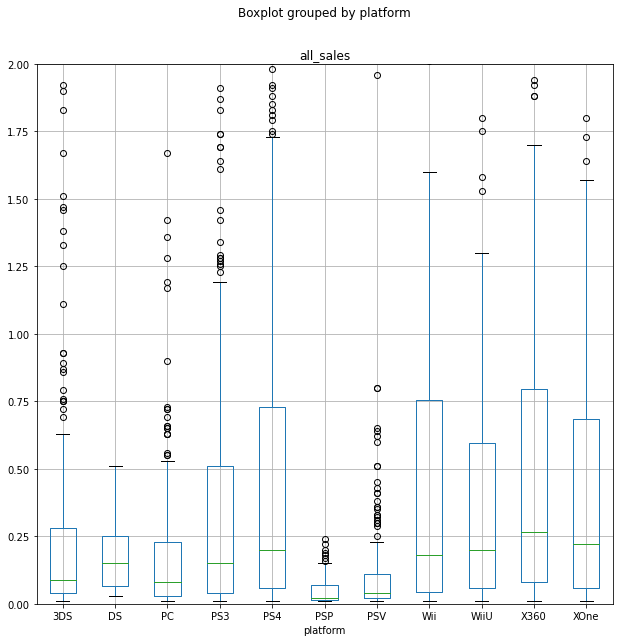

In [16]:
data_act.boxplot(by='platform',column='all_sales',figsize=(10,10)).set_ylim(0,2)

Визуализирован разброс продаж по платформам, видно что лучше всех показывают себя PS4 X360 XOne, медиана и первая квантиль у них больше чем у остальных консолей

### Визиулизируем зависимость продаж от отзывов критиков и пользователей

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

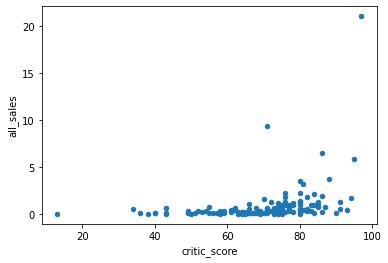

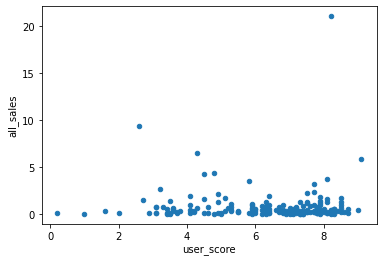

In [17]:
data_act[data_act['platform']=='PS3'].plot.scatter(x='critic_score',y='all_sales')
data_act[data_act['platform']=='PS3'].plot.scatter(x='user_score',y='all_sales')

Из графиков видно, что у всех отлично продающихся игр хорошие оценки критиков, но не все игры с хорошими оценками хорошо продаются. 

In [18]:
data_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             2233 non-null   object  
 1   platform         2233 non-null   object  
 2   year_of_release  2233 non-null   Int16   
 3   genre            2233 non-null   object  
 4   na_sales         2233 non-null   float64 
 5   eu_sales         2233 non-null   float64 
 6   jp_sales         2233 non-null   float64 
 7   other_sales      2233 non-null   float64 
 8   critic_score     991 non-null    float64 
 9   user_score       1192 non-null   float32 
 10  rating           2233 non-null   category
 11  all_sales        2233 non-null   float64 
dtypes: Int16(1), category(1), float32(1), float64(6), object(3)
memory usage: 192.3+ KB


### Вычислим корреляцию продаж и отзывов

In [19]:
print(data_act[data_act['platform']=='PS3']['critic_score'].corr(data_act[data_act['platform']=='PS3']['all_sales']))
print(data_act[data_act['platform']=='PS3']['user_score'].corr(data_act[data_act['platform']=='PS3']['all_sales']))

0.3342853393371919
0.002394400961844767


на примере одной платформы посмотрим корреляцию продаж с оценками, можно заметить что корреляция слабая

In [20]:
print(data_act['critic_score'].corr(data_act['all_sales']))
print(data_act['user_score'].corr(data_act['all_sales']))

0.3136995151027371
-0.0026078138278985497


взяв весь массив данных можно заметить что оценки критиков имеют больший вес чем у пользователей но это все еще малая корреляция.

<AxesSubplot:xlabel='platform', ylabel='number of games for platform'>

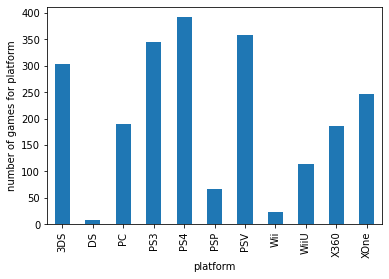

In [21]:
data_act.groupby('platform').count()['name'].plot(kind='bar',ylabel='number of games for platform')

этот грфаик показывает что данных у DS PSP Wii слишком мало для учета их корреляции

In [22]:
for i in data_act['platform'].unique():
    print(i)
    print(data_act[data_act['platform']==i]['critic_score'].corr(data_act[data_act['platform']==i]['all_sales']))
    print(data_act[data_act['platform']==i]['user_score'].corr(data_act[data_act['platform']==i]['all_sales']))

PS3
0.3342853393371919
0.002394400961844767
X360
0.3503445460228664
-0.011742173023024481
PS4
0.40656790206178095
-0.031957109005188264
3DS
0.3570566142288103
0.24150410134889128
XOne
0.4169983280084017
-0.06892505319711206
WiiU
0.3764149065423912
0.4193304906105183
Wii
nan
0.682941697467419
PC
0.19603028294369382
-0.09384187001471048
PSV
0.2547423503068656
0.0009424392873698942
DS
nan
nan
PSP
nan
-0.9999999999999999


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


просмотрев корреляции всех платформ можно выделить Xbox One, PS3, PS4, Xbox 360  с корреляцией критиков около 0.4 и WiiU с корреляцией 0.4 у пользователей.
платформы DS PSP Wii не должны рассматриваться по причине малых данных или их отсутствия.

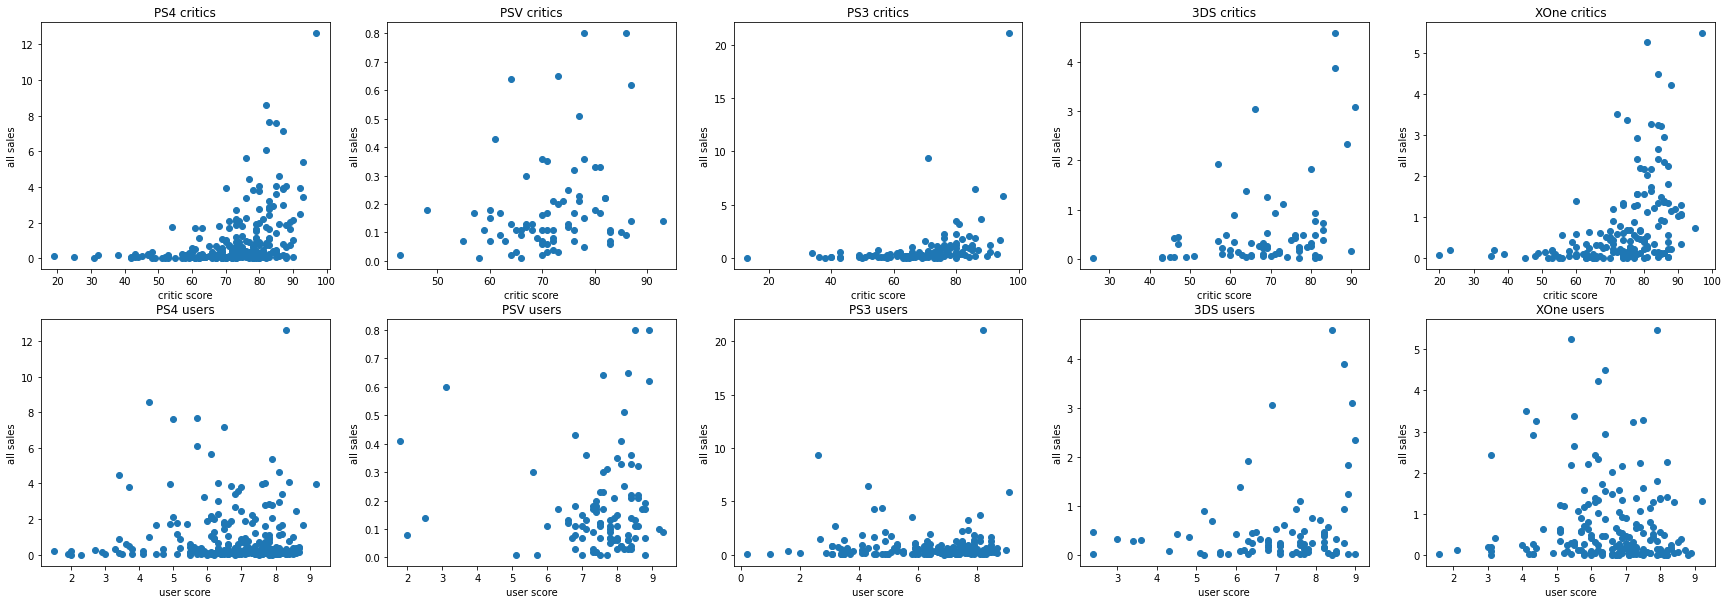

In [23]:
fig, ax = plt.subplots(2,5,figsize=(30,10))
plat=data_act.groupby('platform').count()['name'].sort_values(ascending=False).head().index
for i in range(5):    
    ax[0,i].scatter(x=data_act[data_act['platform']==plat[i]]['critic_score'], y=data_act[data_act['platform']==plat[i]]['all_sales'])
    ax[0,i].set_title(plat[i] + ' critics')
    ax[0,i].set_ylabel('all sales')
    ax[0,i].set_xlabel('critic score')
    ax[1,i].scatter(x=data_act[data_act['platform']==plat[i]]['user_score'], y=data_act[data_act['platform']==plat[i]]['all_sales'])
    ax[1,i].set_title(plat[i] + ' users')
    ax[1,i].set_ylabel('all sales')
    ax[1,i].set_xlabel('user score')

по некоторым графикам можно заметить вид растущей экспоненты, но некоторые графики например отзывы критиков на игры PSV которые  не подчиняются данной закономерности, так что можно повторить вывод что обычно хорошо продающиеся игры хорошо оценены критиками, но не все игры которые хорошо оценены критиками хорошо продаются.

### Проанализируем данные по жанрам игр

<AxesSubplot:xlabel='genre', ylabel='number of games in genre'>

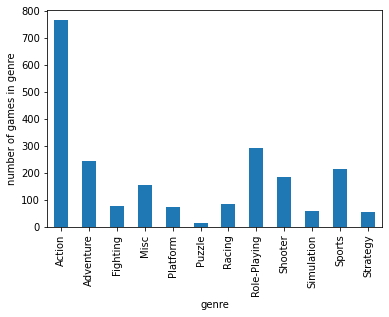

In [24]:
#display(data_act.groupby('genre').count()['name'])
data_act.groupby('genre').count()['name'].plot(kind='bar',ylabel='number of games in genre')

<AxesSubplot:xlabel='genre', ylabel='worldwide sales per genre'>

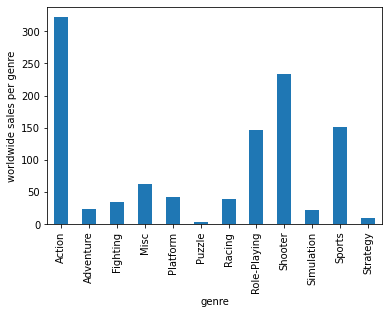

In [25]:
data_act.groupby('genre').sum()['all_sales'].plot(kind='bar',ylabel='worldwide sales per genre')

Из графиков можно наблюдать большое количество игр в жанре экшен и этот же жанр продается больше всего, 
хуже всех продаются жанры пазл и стратегии, так же заметно продаются шутеры и спортивные игры,
а игры в жанре приключений продаются плохо не смотря на обилие жанра.

(0.0, 2.0)

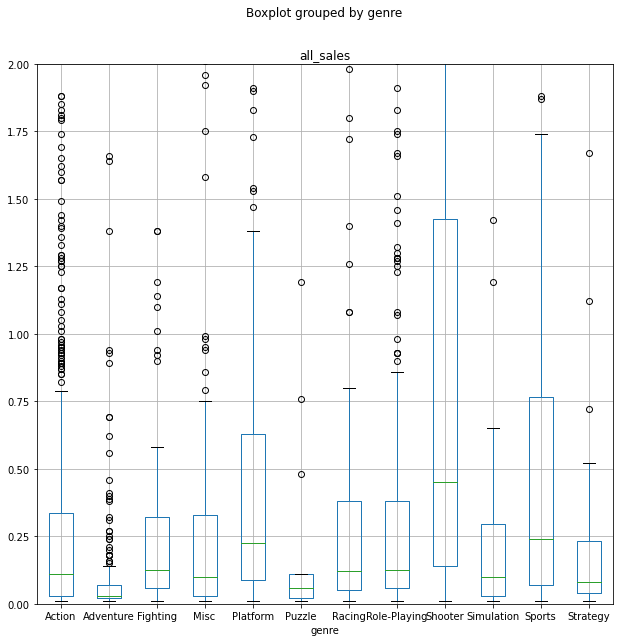

In [26]:
data_act.boxplot(by='genre',column='all_sales',figsize=(10,10)).set_ylim(0,2)
#plt.set_ylim(0, 2)
#plt.show()

Из диаграммы размаха можно увидеть что медиана и первая квантиль больше у игр в жанре шутеров спорт и платформеры

### Вычислим абсолютное и относительное количество продаж копий игр по жанру

In [27]:
for i in data_act['genre'].unique():
    print(i,'all copies in genre:', data_act[data_act['genre']==i]['all_sales'].sum(), 'copies per game in genre:',\
         data_act[data_act['genre']==i]['all_sales'].sum()/data_act[data_act['genre']==i]['all_sales'].count())

Action all copies in genre: 321.87000000000006 copies per game in genre: 0.4201958224543082
Shooter all copies in genre: 232.98000000000002 copies per game in genre: 1.2458823529411767
Role-Playing all copies in genre: 145.89 copies per game in genre: 0.4996232876712328
Misc all copies in genre: 62.82000000000001 copies per game in genre: 0.40529032258064523
Sports all copies in genre: 150.65 copies per game in genre: 0.7039719626168225
Fighting all copies in genre: 35.309999999999995 copies per game in genre: 0.44137499999999996
Racing all copies in genre: 39.88999999999999 copies per game in genre: 0.46929411764705875
Simulation all copies in genre: 21.76000000000001 copies per game in genre: 0.350967741935484
Platform all copies in genre: 42.629999999999995 copies per game in genre: 0.576081081081081
Strategy all copies in genre: 10.080000000000002 copies per game in genre: 0.18000000000000002
Adventure all copies in genre: 23.639999999999997 copies per game in genre: 0.096489795918

Так же я посчитал количество проданных копий на количество игр в каждой категории, относительные параметры таковы что лучше всего показали себя шутеры и платформеры, а хуже всех приключения пазлы и стратегии. В абсолютном плане лучше всех экшн игры.

**Из этого раздела можно сделать вывод что стоит обратить внимание на плафтормы PS4 и XOne, а так же игры с жанром шутеры и экшн**

## ***Раздел составление портрета потребителя***<br>
В этом разделе будут проанализированы данные и составлен портрет отражающий тенденции покупателей в разных регионах

### Рассмотрим 5 самых популярных платформ и жанров 

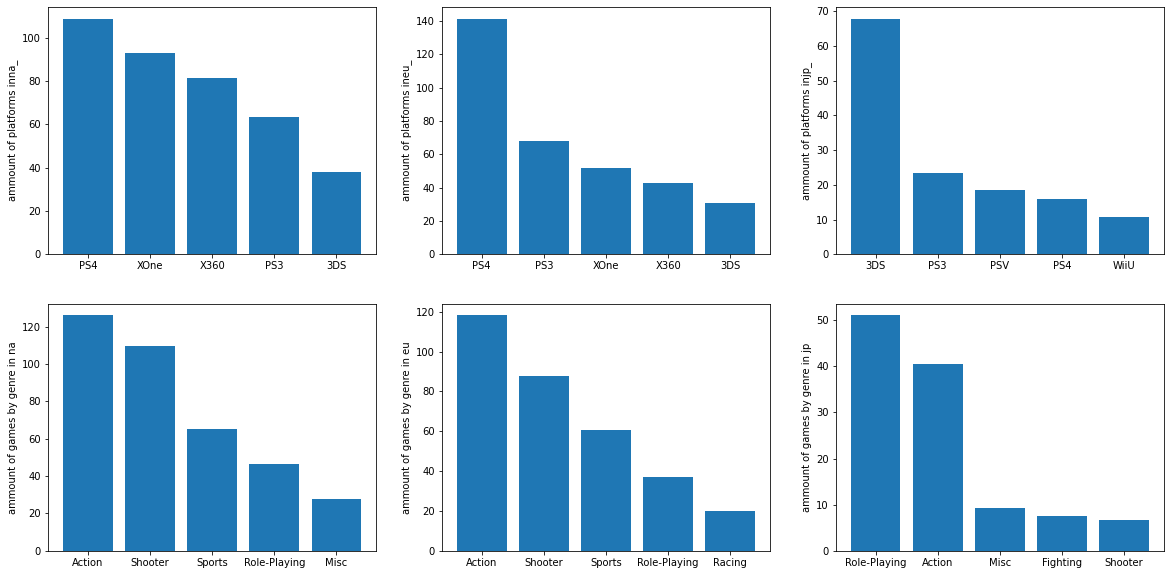

In [28]:
#display(data_act)
fig, ax = plt.subplots(2,3,figsize=(20,10))

reg=['na_sales','eu_sales','jp_sales']

for i in range(3):
    
    curr_ax = ax[0,i]

    curr_ax.bar(height=data_act.groupby('platform')[reg[i]].sum().sort_values(ascending=False).head().to_list(),\
                    x=data_act.groupby('platform')[reg[i]].sum().sort_values(ascending=False).head().index.values)
    curr_ax.set_ylabel('ammount of platforms in'+ reg[i][:3])
    
    sec_ax = ax[1,i]
    
    sec_ax.bar(height=data_act.groupby('genre')[reg[i]].sum().sort_values(ascending=False).head().to_list(),\
                    x=data_act.groupby('genre')[reg[i]].sum().sort_values(ascending=False).head().index.values)
    sec_ax.set_ylabel('ammount of games by genre in '+reg[i][:2])


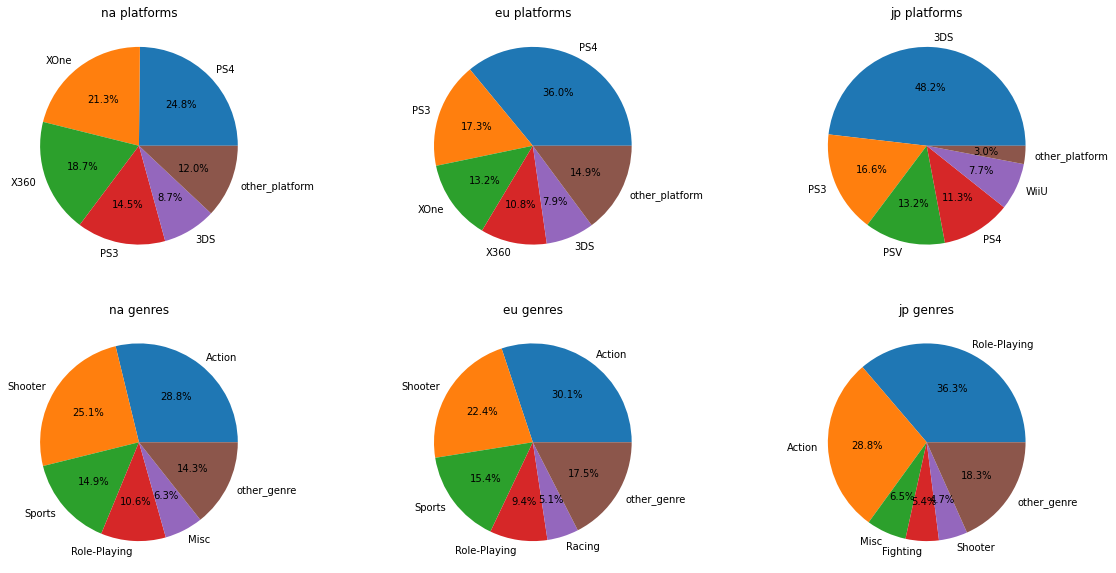

In [29]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
label=[]

reg=['na_sales', 'eu_sales', 'jp_sales']

for i in range(3):
    total=data_act.groupby('platform')[reg[i]].sum().sum()
    top5=data_act.groupby('platform')[reg[i]].sum().sort_values(ascending=False).head().values
    perc=[x / total for x in top5]
    perc.append((total - top5.sum())/total)
    label=list(data_act.groupby('platform')[reg[i]].sum().sort_values(ascending=False).head().index.values)
    label.append('other_platform')
    ax[0,i].pie(perc, labels=label, autopct='%1.1f%%',normalize=True)
    ax[0,i].set_title(reg[i][:2]+' platforms')
    
    total=data_act.groupby('genre')[reg[i]].sum().sum()
    top5=data_act.groupby('genre')[reg[i]].sum().sort_values(ascending=False).head().values
    perc=[x / total for x in top5]
    perc.append((total - top5.sum())/total)
    label=list(data_act.groupby('genre')[reg[i]].sum().sort_values(ascending=False).head().index.values)
    label.append('other_genre')
    ax[1,i].pie(perc, labels=label, autopct='%1.1f%%',normalize=True)
    ax[1,i].set_title(reg[i][:2]+' genres')

Для северной америки лучшие платформы это X360,Wii, PS3, DS, PS4 с доминирующей платформой x360
Для европы ситуация аналогична в плане платформ но лидирует ps3, а в японии  PSP 3DS заменяют PS4 и X360 и лидирует DS и 3DS.
по жанрам в северной америке доминирует экшн после идут шутеры, спорт, игры без категории, и рпг, в европе аналогично за исключением РПГ сменившихся на гонки, в японии лидируют рпг с отрывом потом идут экшн, без категории, спорт и приключения.

### Рассмотри распределение игр по рейтингу

<AxesSubplot:xlabel='rating', ylabel='number of games with such rating in Europe'>

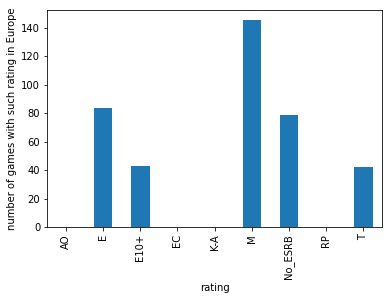

In [30]:

data_act.groupby('rating').sum()['eu_sales'].plot(kind='bar', ylabel='number of games with such rating in Europe')

<AxesSubplot:xlabel='rating', ylabel='number of games with such rating in North America'>

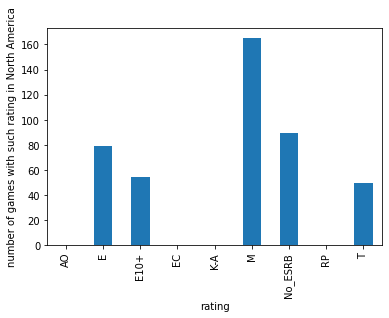

In [31]:
data_act.groupby('rating').sum()['na_sales'].plot(kind='bar', ylabel='number of games with such rating in North America')

<AxesSubplot:xlabel='rating', ylabel='number of games with such rating in Japan'>

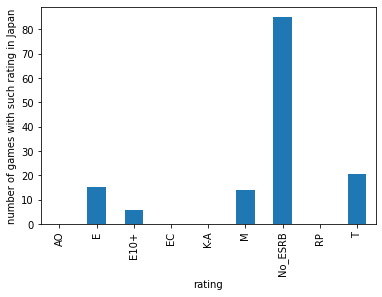

In [32]:
data_act.groupby('rating').sum()['jp_sales'].plot(kind='bar', ylabel='number of games with such rating in Japan')

Можно заметить что в америке продажи игр с рейтингом M mature то есть для взрослых продаются почти одинаково с рейтингом E for everyone, в европе и японии такие игры продаются хуже, хоть в европе такие игры занимают второе мести в японии они продаются почти в 2 раза меньше. Так же заметно большое количество игр без оценки в японии, скорее всего японские разработчики не используют рейтинг ESRB

**В этом разделе мы подтвердили догадки о популярности PS4 и XOne, жанра экшн и шутеров, и рейтинга M для Европы и Северной Америки, для Японии ситуация отличается в этом регионе популярны РПГ и игры без рейтинга**

## ***Раздел проверки гипотез*** <br>
В этом разделе будут проверены гипотезы о связи рейтингов с платформами и жанрами

### Проверка первой гипотезы <br>
Гипотеза состоит в том что рейтинги игр на платформах Xbox One и PC одинаковы, альтернатива рейтинги разные

In [33]:
from scipy import stats as st
#xbox = data_act[(data_act['platform']=='XOne') & (data_act['user_score'].notna())]
#pc = data_act[(data_act['platform']=='PC') & (data_act['user_score'].notna())]

xbox = data_act[(data_act['platform']=='XOne')].dropna()
pc = data_act[(data_act['platform']=='PC')].dropna()

res = st.ttest_ind(xbox['user_score'],\
                  pc['user_score'],equal_var=False)
alpha = 0.05
print(res.pvalue)
if res.pvalue<alpha:
    print('Средние рейтинги разные')
else:
    print('средние рейтинги одинаковые')
    

0.17882517015736454
средние рейтинги одинаковые


### Проверка второй гипотезы <br>
Гипотеза состоит в том что рейтинги игр в жанре экшн и спорт одинаковые, альтернатива рейтинги разные

In [34]:
action = data_act[(data_act['genre']=='Action')].dropna()
#display()
sport = data_act[(data_act['genre']=='Sports')].dropna()

res = st.ttest_ind(action['user_score'],\
                  sport['user_score'],equal_var=False)
alpha = 0.05
print(res.pvalue)
if res.pvalue<alpha:
    print('средние рейтинги одинаковые')
else:
    print('Средние рейтинги разные')

1.0497430602483277e-13
средние рейтинги одинаковые


Формулировка гипотезы исходила из поставленной задачи, в первом случае сравнение рейтингов xbox one и PC легко составить 0 гипотезу о равенстве отзывов, соответственно альтернатива неравенство отызвов, во втором случае поступили аналогично, для проверки гипотез использовался двусторонний тест t-тест Стьюдента, так как нам нужно сравнить данные о средних двух совокупностей.

(0.0, 10.0)

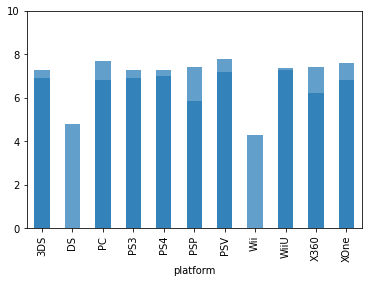

In [35]:
data_act.groupby('platform')['user_score'].median().plot.bar(alpha=0.7).set_ylim(0,10)
(data_act.groupby('platform')['critic_score'].median()/10).plot.bar(alpha=0.7).set_ylim(0,10)

(0.0, 10.0)

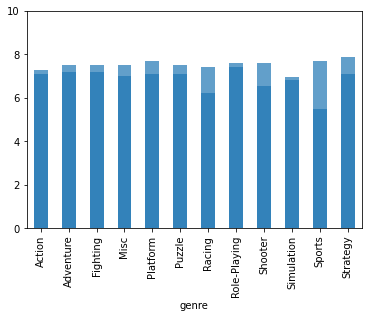

In [36]:
data_act.groupby('genre')['user_score'].median().plot.bar(alpha=0.7).set_ylim(0,10)
(data_act.groupby('genre')['critic_score'].median()/10).plot.bar(alpha=0.7).set_ylim(0,10)

<font color='DarkBlue'><b>Комментарий ревьюера 4</b></font><br>
<font color='DarkMagenta'>👉 Средние считаются по другому:</font>

In [37]:
# Комментарий ревьюера 4
xbox.user_score.mean(), pc.user_score.mean(), action.user_score.mean(), sport.user_score.mean()

(6.5381823, 6.3020267, 6.9362454, 5.6654553)

## **Вывод**<br>
В результате работы была проведена обработка и анализ данных что позволило более информативно рассмотреть данные, впоследствии был получен портерты пользователей из разных регионов и были проверены гипотезы о рейтингах платформ и жанров.<br> 
Можно сказать что лучше всего в 2017 году в америке и европе покажут себя шутеры на PS4, данные  дают нам понять что шутер с рейтингом M достаточно популярный тип игр и продается обычно около миллиона копий, в японии доминируют рпг на 3DS, что поможет сделать региональную рекламную кампанию. Так же благодаря гипотезам стало понятно что рейтинги между жанрами схожи, но заметно что консоли Wii PSP DS сильно проседают по общим рейтингам. Насчет отзывов будет более безопасно если игра имеет хорошие отзывы от критиков, но это не гарантирует ее успех. 